In [21]:
#tried all preproce... nothing
#had the error InvalidArgumentError: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
#so i changed the activation functions.. saw somebody with the same problem on the forum and it was recommended to check activation functions on keras docs.
#https://carnd-forums.udacity.com/questions/35229158/p3-avoid-predicted-steering-angles-outside-0-1-
#tried then change from sparse_categorical_crossentropy to mean square error
#ive started with 10 epochs but it seems 3/4e are enough
#dropouts from 0.5 to 0.2 and removed last activation

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.utils import shuffle
from PIL import Image


# reading in an image
# printing out some stats and plotting
#image = mpimg.imread('data/data/IMG/center_2016_12_01_13_30_48_287.jpg')
#image = mpimg.imread('data/data/IMG/center_2016_12_01_13_34_06_757.jpg')
#image = mpimg.imread('data/data/IMG/center_2016_12_01_13_35_35_878.jpg')
#image = mpimg.imread('data/data/IMG/center_2016_12_01_13_37_29_447.jpg')
image = mpimg.imread('data/data/IMG/center_2016_12_01_13_39_12_047.jpg')

print('This image is:', type(image), 'with dimesions:', image.shape)
#plt.imshow(image)
#plt.show()
# -> size of image: (160,320,3) , is already a numpy.ndarray

#preprocess image (code copied from project 1)
#gray scale xxx
#gaussian xxx
#normalize xx
#laplacian?
#Clahe?
#cannyxxx
#mask image? xxx

# def grayscale(img):
#     return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# def region_of_interest(img, vertices):
#     """
#     Applies an image mask.

#     Only keeps the region of the image defined by the polygon
#     formed from `vertices`. The rest of the image is set to black.
#     """
#     # defining a blank mask to start with
#     mask = np.zeros_like(img)

#     # defining a 3 channel or 1 channel color to fill the mask with depending on the input image
#     if len(img.shape) > 2:
#         channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
#         ignore_mask_color = (255,) * channel_count
#     else:
#         ignore_mask_color = 255

#     # filling pixels inside the polygon defined by "vertices" with the fill color
#     cv2.fillPoly(mask, vertices, ignore_mask_color)

#     # returning the image only where mask pixels are nonzero
#     masked_image = cv2.bitwise_and(img, mask)
#     return masked_image
def normalize(img):
    a=0
    b=1
    minClr=0
    maxClr=255
    return a+(((img-minClr)*(b-a))/(maxClr-minClr))
# def gaussian_blur(img, kernel_size):
#     return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
# def canny(img, low_threshold, high_threshold):
#     return cv2.Canny(img, low_threshold, high_threshold)

#parameters for image preprocessing
# midpoint=65
# midpoint2=100
# vertices = np.array([[(0,image.shape[0]),(image.shape[1], image.shape[0]), (image.shape[1], midpoint), (0,midpoint)]], dtype=np.int32)
# vertices2 = np.array([[(0,0),(0,image.shape[0]),(120, midpoint2),(200,midpoint2), (image.shape[1], image.shape[0]), (image.shape[1],0),(0,0)]], dtype=np.int32)
# kernel_size_gaussian=9
# low_threshold_canny=10
# high_threshold_canny=170

def pre_proc_one_image(image):
    #image = grayscale(image)
    #image = gaussian_blur(image, kernel_size_gaussian)
    #image = canny(image, low_threshold_canny, high_threshold_canny)
    image = normalize(image)
    image= image[55:, :,:]
    image= image[:80,:,:]
    
    r = 160.0 /image.shape[1]
    dim = (160, int(image.shape[0] * r))
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    
    return image



#image=pre_proc_one_image(image)

# plt.imshow(image,cmap='gray')
# plt.show()
# print(image)
# print(image.shape)
#image size is now (160,320)

#shrink image to half
#image size is now (80,160)

This image is: <class 'numpy.ndarray'> with dimesions: (160, 320, 3)


In [22]:
#-----------------------load images + process them / load labels--------
X_train = []
y_train = []

path_to_data = 'data/data/'
csv_file = 'driving_log.csv'
#csv_file = 'small.csv'


with open(path_to_data + csv_file) as csv_file:
    csv_file.readline()
    for i in csv_file:
        image = plt.imread(path_to_data + i.split(',')[0])
        X_train.append(pre_proc_one_image(image))
        #X_train.append(image)
        y_train.append(float(i.split(',')[3]))

print("done")
print('This image is:', type(image), 'with dimesions:', image.shape)



done
This image is: <class 'numpy.ndarray'> with dimesions: (160, 320, 3)


(8036, 40, 160, 3)


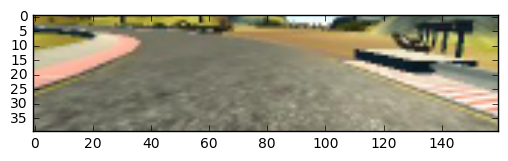

308582400


In [23]:
X_train = np.array(X_train,dtype=np.float16)
y_train = np.array(y_train,dtype=np.float16)

print(X_train.shape)
image=X_train[3]
plt.imshow(image)
plt.show()

print(X_train.nbytes)


In [24]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=57)


In [25]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

#started with the network from Keras lab
#changed the input change but kept the lab's kernel and filter size

model = Sequential()
model.add(Convolution2D(32, 3, 3,  border_mode='valid', input_shape=(40, 160,3)))
#model.add(Convolution2D(32, 3, 3,  border_mode='valid', input_shape=(160, 320,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Activation('tanh'))
#added one more convultion/MaxPool/Drop out.
model.add(Convolution2D(16, 3, 3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(8, 3, 3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dense(64))
#substitute softmax with relu
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(16))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(4))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(2))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
          
model.add(Dense(1))
#model.add(Activation('tanh'))




In [26]:
model.compile('adam', 'mean_squared_error', ['accuracy'])
history = model.fit(X_train, y_train, nb_epoch=3, validation_split=0.2)

metrics = model.evaluate(X_test, y_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

Train on 5142 samples, validate on 1286 samples
Epoch 1/3
5142/5142 [==============================] - 274s - loss: 0.0177 - acc: 0.5496 - val_loss: 0.0124 - val_acc: 0.5295
Epoch 2/3
5142/5142 [==============================] - 258s - loss: 0.0138 - acc: 0.5496 - val_loss: 0.0106 - val_acc: 0.5295
Epoch 3/3
1608/1608 [==============================] - 36s    
loss: 0.009674790023422954
acc: 0.5310945273631841


In [27]:
from keras.models import model_from_json
import json

json_string = model.to_json()
with open('model.json', 'w') as outfile:
    json.dump(json_string, outfile)

# model = model_from_json(json_string)


model.save_weights('model.h5')

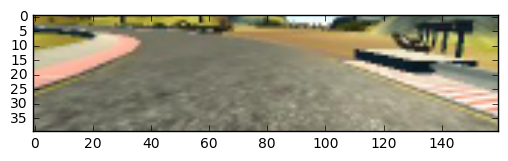

-0.05312606692314148


In [28]:
plt.imshow(image)
plt.show()

image=image[None,:,:,:]

steering_angle = float(model.predict(image, batch_size=1))
print(steering_angle)